___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

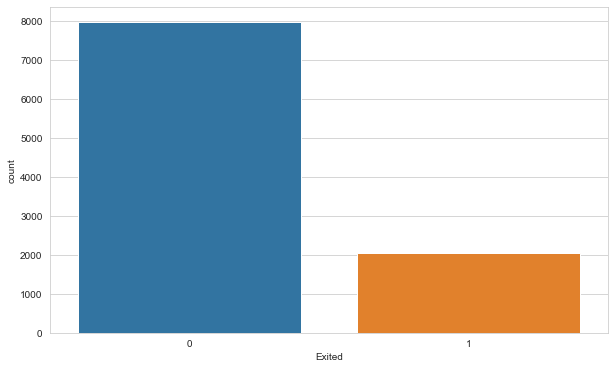

In [13]:
sns.countplot(df.Exited);

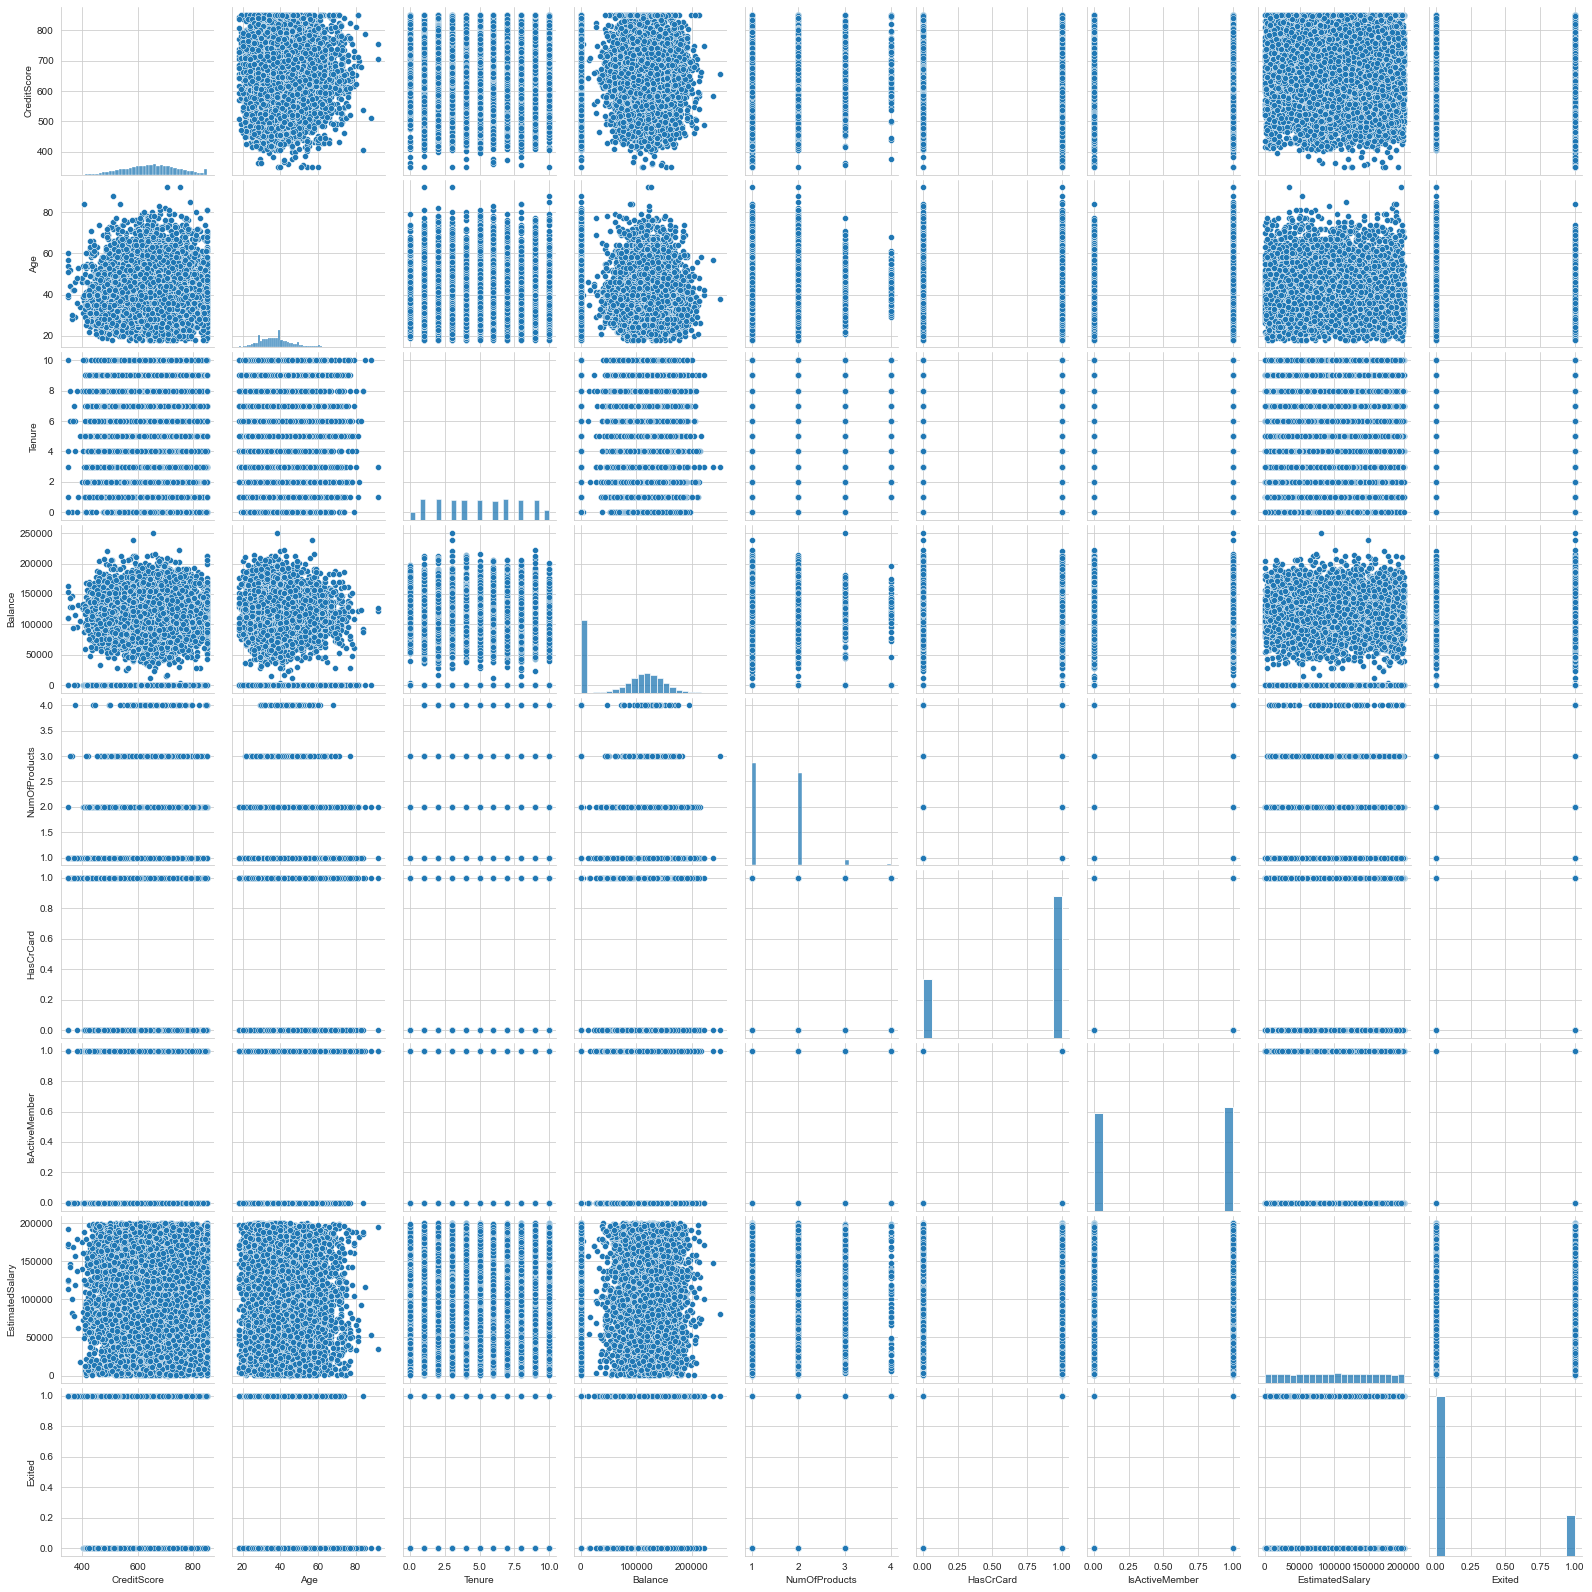

In [14]:
sns.pairplot(df)

<AxesSubplot:>

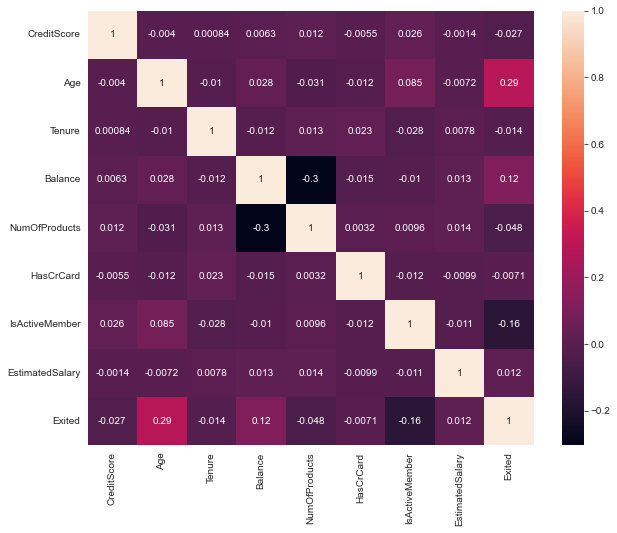

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

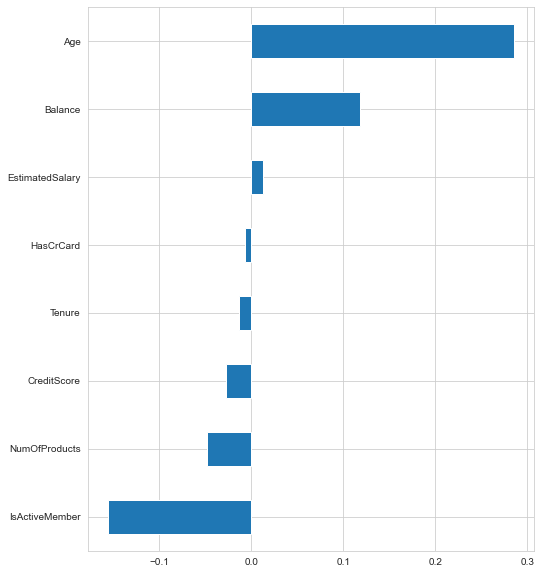

In [16]:
plt.figure(figsize=(8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")

# Preprocessing of Data
- Train | Test Split, Scalling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
X = df.drop("Exited", axis=1)
y = df.Exited

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)

In [20]:
X_train.shape

(9000, 8)

In [21]:
X_test.shape

(1000, 8)

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [25]:
pip install tensorflow

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["Recall"])

In [28]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6337 - recall: 0.1837 - val_loss: 0.5175 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5088 - recall: 0.0000e+00 - val_loss: 0.4986 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4950 - recall: 0.0000e+00 - val_loss: 0.4863 - val_recall: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4843 - recall: 0.0000e+00 - val_loss: 0.4747 - val_recall: 0.0000e+00
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4742 - recall: 0.0000e+00 - val_loss: 0.4646 - val_recall: 0.0000e+00
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4646 - recall: 0.0000e+00 - val_loss: 0.4555 - val_recall: 0.0000e+00
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4556 - recall: 0.0012 - val_loss: 0.4467 - va

127/127 [==============================] - 0s 2ms/step - loss: 0.3570 - recall: 0.3990 - val_loss: 0.3628 - val_recall: 0.4022
Epoch 60/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3577 - recall: 0.4002 - val_loss: 0.3617 - val_recall: 0.4185
Epoch 61/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3566 - recall: 0.4021 - val_loss: 0.3622 - val_recall: 0.4076
Epoch 62/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3565 - recall: 0.3972 - val_loss: 0.3621 - val_recall: 0.3967
Epoch 63/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3566 - recall: 0.4008 - val_loss: 0.3647 - val_recall: 0.3641
Epoch 64/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3560 - recall: 0.3984 - val_loss: 0.3608 - val_recall: 0.4239
Epoch 65/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3563 - recall: 0.4002 - val_loss: 0.3603 - val_recall: 0.4185
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 2ms/step - loss: 0.3508 - recall: 0.4027 - val_loss: 0.3554 - val_recall: 0.4239
Epoch 118/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3507 - recall: 0.4081 - val_loss: 0.3560 - val_recall: 0.4076
Epoch 119/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3512 - recall: 0.4051 - val_loss: 0.3604 - val_recall: 0.3696
Epoch 120/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3519 - recall: 0.4008 - val_loss: 0.3549 - val_recall: 0.4348
Epoch 121/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3503 - recall: 0.4039 - val_loss: 0.3543 - val_recall: 0.4239
Epoch 122/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3499 - recall: 0.4051 - val_loss: 0.3551 - val_recall: 0.4293
Epoch 123/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3508 - recall: 0.4039 - val_loss: 0.3559 - val_recall: 0.4674
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 2ms/step - loss: 0.3486 - recall: 0.4130 - val_loss: 0.3534 - val_recall: 0.4620
Epoch 176/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3493 - recall: 0.4154 - val_loss: 0.3534 - val_recall: 0.4565
Epoch 177/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3487 - recall: 0.4069 - val_loss: 0.3561 - val_recall: 0.4783
Epoch 178/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3490 - recall: 0.4166 - val_loss: 0.3529 - val_recall: 0.4402
Epoch 179/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3487 - recall: 0.4184 - val_loss: 0.3581 - val_recall: 0.4837
Epoch 180/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3479 - recall: 0.4209 - val_loss: 0.3535 - val_recall: 0.4130
Epoch 181/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3482 - recall: 0.4136 - val_loss: 0.3545 - val_recall: 0.4130
Epoch 182/200
127/127 [====

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.634,0.184,0.517,0.000
1,0.509,0.000,0.499,0.000
2,0.495,0.000,0.486,0.000
3,0.484,0.000,0.475,0.000
4,0.474,0.000,0.465,0.000


<AxesSubplot:>

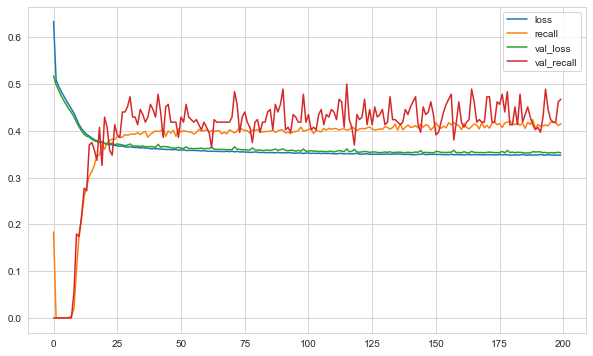

In [31]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [32]:
model.evaluate(X_test, y_test, verbose=0)

[0.35847046971321106, 0.45098039507865906]

In [33]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("test_loss", loss)
print("test_recall", recall)

test_loss 0.35847046971321106
test_recall 0.45098039507865906


In [34]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[764  32]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 1ms/step


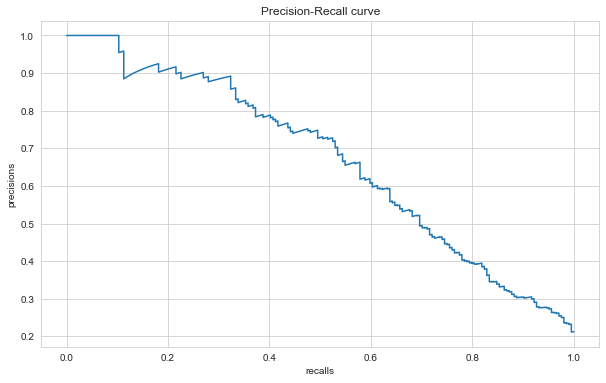

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [36]:
average_precision_score(y_test, y_pred_proba)

0.6690877287578707

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [37]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [38]:
from sklearn.utils import class_weight

In [39]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [40]:
class_weights = {0: class_weights[0], 1:class_weights[1]}

In [41]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [42]:
model.fit(x=X_train, y=y_train,validation_split=0.1, class_weight=class_weights, batch_size=64,verbose=1,epochs=200)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6875 - recall: 0.1510 - val_loss: 0.6685 - val_recall: 0.5870
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6727 - recall: 0.5840 - val_loss: 0.6438 - val_recall: 0.5924
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6527 - recall: 0.6355 - val_loss: 0.6308 - val_recall: 0.6304
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6346 - recall: 0.6586 - val_loss: 0.6366 - val_recall: 0.7011
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6198 - recall: 0.6786 - val_loss: 0.6462 - val_recall: 0.7554
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6065 - recall: 0.6962 - val_loss: 0.6144 - val_recall: 0.7120
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5919 - recall: 0.7113 - val_loss: 0.5815 - val_recall: 0.6793
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 2ms/step - loss: 0.4831 - recall: 0.7326 - val_loss: 0.4912 - val_recall: 0.7337
Epoch 60/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4824 - recall: 0.7307 - val_loss: 0.4707 - val_recall: 0.7120
Epoch 61/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4825 - recall: 0.7289 - val_loss: 0.4758 - val_recall: 0.7120
Epoch 62/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4819 - recall: 0.7374 - val_loss: 0.4724 - val_recall: 0.7120
Epoch 63/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4818 - recall: 0.7350 - val_loss: 0.4534 - val_recall: 0.7065
Epoch 64/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4829 - recall: 0.7344 - val_loss: 0.4681 - val_recall: 0.7120
Epoch 65/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4819 - recall: 0.7447 - val_loss: 0.4808 - val_recall: 0.7174
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 2ms/step - loss: 0.4779 - recall: 0.7374 - val_loss: 0.4917 - val_recall: 0.7500
Epoch 118/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4772 - recall: 0.7295 - val_loss: 0.4729 - val_recall: 0.7174
Epoch 119/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4784 - recall: 0.7344 - val_loss: 0.4568 - val_recall: 0.7065
Epoch 120/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4775 - recall: 0.7271 - val_loss: 0.4970 - val_recall: 0.7609
Epoch 121/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4775 - recall: 0.7411 - val_loss: 0.4670 - val_recall: 0.7283
Epoch 122/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4777 - recall: 0.7441 - val_loss: 0.4476 - val_recall: 0.7011
Epoch 123/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4783 - recall: 0.7380 - val_loss: 0.4445 - val_recall: 0.7065
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 2ms/step - loss: 0.4751 - recall: 0.7386 - val_loss: 0.4732 - val_recall: 0.7337
Epoch 176/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4750 - recall: 0.7344 - val_loss: 0.4712 - val_recall: 0.7337
Epoch 177/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4752 - recall: 0.7459 - val_loss: 0.4480 - val_recall: 0.7120
Epoch 178/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4752 - recall: 0.7344 - val_loss: 0.4384 - val_recall: 0.6957
Epoch 179/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4745 - recall: 0.7386 - val_loss: 0.4547 - val_recall: 0.7228
Epoch 180/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4746 - recall: 0.7404 - val_loss: 0.4597 - val_recall: 0.7228
Epoch 181/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4744 - recall: 0.7332 - val_loss: 0.4730 - val_recall: 0.7391
Epoch 182/200
127/127 [====

<AxesSubplot:>

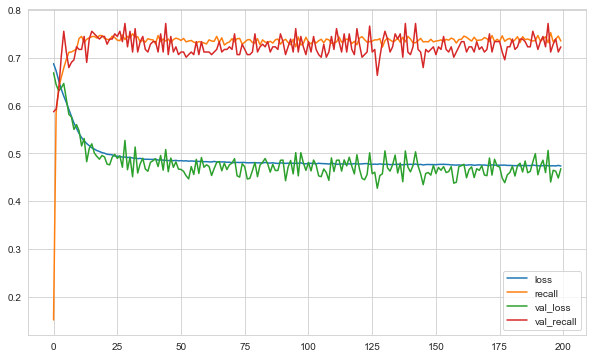

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.4849860370159149, 0.7401960492134094]

In [45]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  0.4849860370159149
Test_Recall :  0.7401960492134094


In [46]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[611 185]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.74      0.56       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.70      1000
weighted avg       0.82      0.76      0.78      1000



32/32 [==============================] - 0s 1ms/step


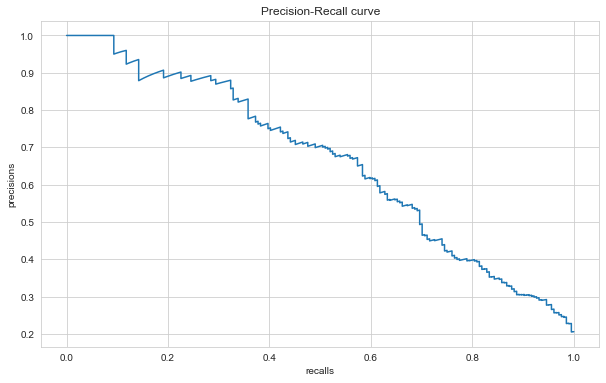

In [48]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [49]:
average_precision_score(y_test,y_pred_proba)

0.6623388066787412

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [50]:
from tensorflow.keras.layers import Dropout

### Add Dropout Layer

In [51]:
model = Sequential()
model.add(Dense(12, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(6, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1, class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6995 - recall: 0.3924 - val_loss: 0.6816 - val_recall: 0.6467
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6868 - recall: 0.6143 - val_loss: 0.6856 - val_recall: 0.7065
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6788 - recall: 0.6495 - val_loss: 0.6613 - val_recall: 0.6576
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6743 - recall: 0.6355 - val_loss: 0.6701 - val_recall: 0.6793
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6682 - recall: 0.6519 - val_loss: 0.6599 - val_recall: 0.6630
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6616 - recall: 0.6434 - val_loss: 0.6738 - val_recall: 0.7283
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6587 - recall: 0.6562 - val_loss: 0.6602 - val_recall: 0.6902
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 2ms/step - loss: 0.5496 - recall: 0.7180 - val_loss: 0.5130 - val_recall: 0.7500
Epoch 60/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5510 - recall: 0.7235 - val_loss: 0.5032 - val_recall: 0.7446
Epoch 61/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5479 - recall: 0.7295 - val_loss: 0.5075 - val_recall: 0.7609
Epoch 62/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5530 - recall: 0.7271 - val_loss: 0.5021 - val_recall: 0.7554
Epoch 63/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5475 - recall: 0.7210 - val_loss: 0.5001 - val_recall: 0.7554
Epoch 64/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5469 - recall: 0.7295 - val_loss: 0.4878 - val_recall: 0.7337
Epoch 65/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5439 - recall: 0.7295 - val_loss: 0.4860 - val_recall: 0.7337
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 2ms/step - loss: 0.5331 - recall: 0.7386 - val_loss: 0.4945 - val_recall: 0.7500
Epoch 118/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5336 - recall: 0.7314 - val_loss: 0.4791 - val_recall: 0.7446
Epoch 119/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5375 - recall: 0.7223 - val_loss: 0.4960 - val_recall: 0.7609
Epoch 120/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5399 - recall: 0.7192 - val_loss: 0.4845 - val_recall: 0.7283
Epoch 121/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5383 - recall: 0.7156 - val_loss: 0.4941 - val_recall: 0.7500
Epoch 122/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5394 - recall: 0.7398 - val_loss: 0.4878 - val_recall: 0.7500
Epoch 123/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5288 - recall: 0.7392 - val_loss: 0.4922 - val_recall: 0.7554
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 2ms/step - loss: 0.5256 - recall: 0.6361 - val_loss: 0.4655 - val_recall: 0.7174
Epoch 176/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5274 - recall: 0.6428 - val_loss: 0.4795 - val_recall: 0.7283
Epoch 177/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5246 - recall: 0.6598 - val_loss: 0.4769 - val_recall: 0.7283
Epoch 178/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5380 - recall: 0.6525 - val_loss: 0.4848 - val_recall: 0.7283
Epoch 179/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5210 - recall: 0.6501 - val_loss: 0.4588 - val_recall: 0.7120
Epoch 180/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - recall: 0.6446 - val_loss: 0.4686 - val_recall: 0.7120
Epoch 181/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5277 - recall: 0.6428 - val_loss: 0.4563 - val_recall: 0.7011
Epoch 182/200
127/127 [====

<AxesSubplot:>

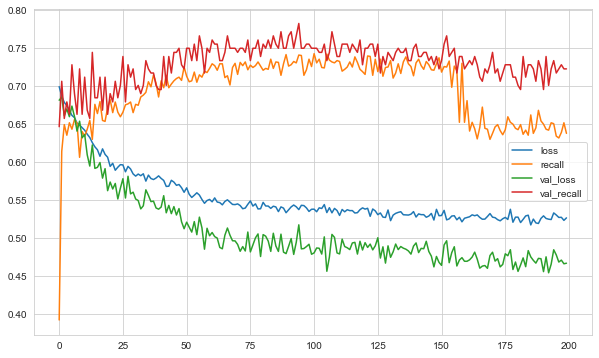

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [54]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  0.4873349368572235
Test_Recall :  0.6813725233078003


In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[639 157]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.68      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.70      1000
weighted avg       0.82      0.78      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [56]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [57]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=25, restore_best_weights = True)

In [58]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200,  callbacks=[early_stop], class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6919 - recall: 0.4985 - val_loss: 0.6902 - val_recall: 0.6576
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6839 - recall: 0.6507 - val_loss: 0.7093 - val_recall: 0.7337
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6716 - recall: 0.6646 - val_loss: 0.6638 - val_recall: 0.6359
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6561 - recall: 0.6361 - val_loss: 0.6665 - val_recall: 0.7011
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6425 - recall: 0.6562 - val_loss: 0.6397 - val_recall: 0.7065
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6281 - recall: 0.6555 - val_loss: 0.5991 - val_recall: 0.6685
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6110 - recall: 0.6798 - val_loss: 0.6217 - val_recall: 0.7174
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 2ms/step - loss: 0.4891 - recall: 0.7647 - val_loss: 0.4355 - val_recall: 0.7228
Epoch 60/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4896 - recall: 0.7477 - val_loss: 0.4849 - val_recall: 0.7609
Epoch 61/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4891 - recall: 0.7617 - val_loss: 0.4832 - val_recall: 0.7554
Epoch 62/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4893 - recall: 0.7635 - val_loss: 0.4922 - val_recall: 0.7717
Epoch 63/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4889 - recall: 0.7568 - val_loss: 0.4663 - val_recall: 0.7500
Epoch 64/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4887 - recall: 0.7538 - val_loss: 0.4727 - val_recall: 0.7554
Epoch 65/200
127/127 [==============================] - 0s 2ms/step - loss: 0.4884 - recall: 0.7617 - val_loss: 0.4750 - val_recall: 0.7446
Epoch 66/200
127/127 [===========

<AxesSubplot:>

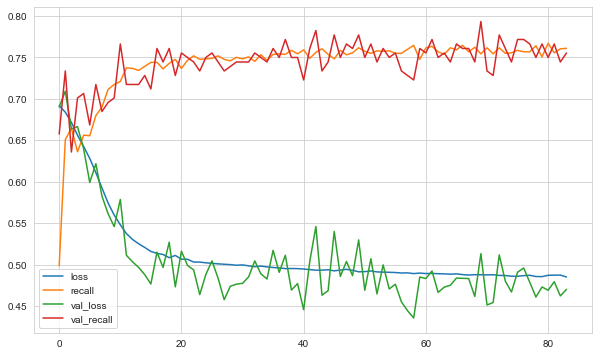

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[641 155]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       796
           1       0.47      0.68      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.79      1000



#### Monitor the "val_recall" as metric

In [61]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [62]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",verbose=1, patience=20, restore_best_weights = True)

In [63]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200, callbacks=[early_stop],class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6915 - recall: 0.4166 - val_loss: 0.6579 - val_recall: 0.4728
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6748 - recall: 0.4706 - val_loss: 0.6464 - val_recall: 0.6033
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6533 - recall: 0.5797 - val_loss: 0.6162 - val_recall: 0.6359
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6323 - recall: 0.6477 - val_loss: 0.6121 - val_recall: 0.6739
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6154 - recall: 0.6731 - val_loss: 0.6051 - val_recall: 0.6685
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6021 - recall: 0.6883 - val_loss: 0.5963 - val_recall: 0.6685
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5946 - recall: 0.6962 - val_loss: 0.6097 - val_recall: 0.6957
Epoch 8/200
127/127 [======

<AxesSubplot:>

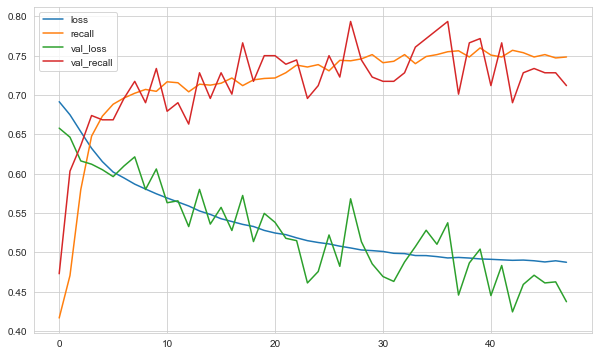

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [65]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[505 291]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       796
           1       0.35      0.78      0.49       204

    accuracy                           0.67      1000
   macro avg       0.64      0.71      0.62      1000
weighted avg       0.80      0.67      0.70      1000



## GridSearchCV

In [66]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [67]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [68]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [69]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [64,128,256], 'optimizer': [Adam, RMSprop, Adadelta, Nadam], 'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,param_grid = parameters, scoring = 'recall', cv = 5, n_jobs = -1, verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/200
127/127 [==============================] - 2s 5ms/step - loss: 0.6811 - recall: 0.5797 - val_loss: 0.6410 - val_recall: 0.6250
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6437 - recall: 0.6064 - val_loss: 0.6121 - val_recall: 0.6685
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6099 - recall: 0.6501 - val_loss: 0.5433 - val_recall: 0.6359
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5909 - recall: 0.6750 - val_loss: 0.5182 - val_recall: 0.6196
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5807 - recall: 0.6665 - val_loss: 0.5646 - val_recall: 0.7609
Epoch 6/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5725 - recall: 0.6616 - val_loss: 0.5429 - val_recall: 0.7391
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 0.5615 - recall: 0.6804 - val

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001634348BEB0>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [70]:
grid_model.best_score_

0.8476341827452376

In [71]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [74]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [72]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
11,0.848,0.031,1,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
35,0.828,0.044,2,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
9,0.816,0.023,3,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
4,0.816,0.042,4,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
21,0.806,0.098,5,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
5,0.803,0.017,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
8,0.803,0.047,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
27,0.798,0.125,8,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."
19,0.790,0.074,9,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
7,0.790,0.029,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [73]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[499 297]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       796
           1       0.36      0.82      0.50       204

    accuracy                           0.67      1000
   macro avg       0.65      0.72      0.62      1000
weighted avg       0.81      0.67      0.70      1000



32/32 [==============================] - 0s 1ms/step


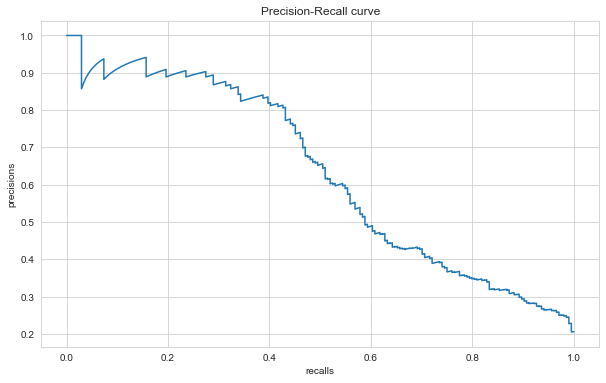

In [75]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [76]:
average_precision_score(y_test,y_pred_proba)

0.632150974814697

# Final Model and Model Deployment

In [77]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [78]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 20, restore_best_weights = True)

In [79]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 200, verbose = 1,
          callbacks = [early_stop], class_weight= class_weights)

Epoch 1/200
71/71 [==============================] - 1s 7ms/step - loss: 0.6870 - recall: 0.4217 - val_loss: 0.6814 - val_recall: 0.6765
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6537 - recall: 0.6448 - val_loss: 0.6300 - val_recall: 0.6422
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5973 - recall: 0.6841 - val_loss: 0.6367 - val_recall: 0.7353
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5648 - recall: 0.6989 - val_loss: 0.4959 - val_recall: 0.6373
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5393 - recall: 0.7163 - val_loss: 0.5448 - val_recall: 0.7108
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5227 - recall: 0.7283 - val_loss: 0.5338 - val_recall: 0.7304
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5191 - recall: 0.7305 - val_loss: 0.5276 - val_recall: 0.7353
Epoch 8/200
71/71 [======================

<AxesSubplot:>

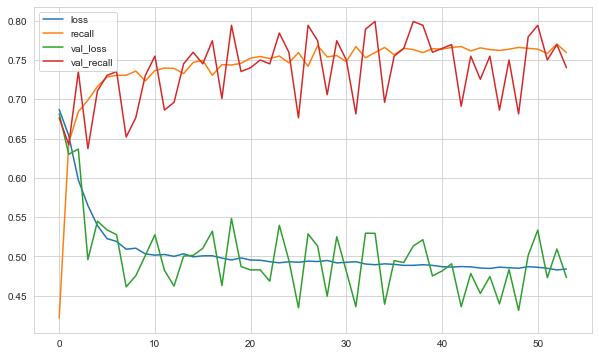

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[536 260]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       796
           1       0.39      0.80      0.52       204

    accuracy                           0.70      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.70      0.73      1000



## Prediction

In [82]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [83]:
model.save('model_churn.h5')

In [84]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [85]:
churn = df.drop('Exited', axis = 1).iloc[224:225, :]
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
224,671,45,6,99564.220,1,1,1,108872.450


In [86]:
churn = scaler_churn.transform(churn) 
churn

array([[0.642     , 0.36486486, 0.6       , 0.39683132, 0.        ,
        1.        , 1.        , 0.54435634]])

In [87]:
(model_churn.predict(churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 75ms/step


array([[1]])

In [88]:
df["Exited"].iloc[0]

1

In [89]:
df.iloc[224:225, :]['Exited']

224    1
Name: Exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___